# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
from scipy.stats import linregress

# Import API key
# enter user's key into api_key file
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    path = "/Users/matth/Desktop"
    sys.path.insert(0, path)
    from API_Keys import api_key
    weather_api_key= api_key["https://openweathermap.org/"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#import pretty print
import pprint as pprint

#for date title in plots and filenames
from datetime import datetime

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
#build url with a few other params, api key, and units imperial for temp in F and windspeed in mph.
query_url = base_url + "appid=" + weather_api_key +"&units=imperial&q="

In [4]:
#set min number of cities needed
citymin = 500



# initialize lists for data storage
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Lat=[]
Long=[]
# include a list of cities that error out.
city_not_found=[]
#initialize count how many cities we've found weather data for.
citycount=0
#check if we have enough cities, if not, abort. if so, proceed to for loop.
if len(cities)<citymin:
    print("-----------------------------")
    print(f"Data Retrieval Aborted.")
    print(f"Rerun Generate Cities List to ensure >{citymin} cities.")
    print("-----------------------------")
else:
    print("Beginning Data Retrieval")     
    print("-----------------------------")
    #begin for loop to store records for each city
    for city in cities:
        try:
            city_url = query_url + city
            response = requests.get(city_url).json()
            # Add a one second interval between queries to (hopefully) stay within API query limits
            time.sleep(.5)
            # Use response to generate lists.
            Max_Temp.append(response["main"]["temp_max"]) 
            Humidity.append(response["main"]["humidity"])
            Cloudiness.append(response["clouds"]["all"])
            Wind_Speed.append(response["wind"]["speed"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Lat.append(response["coord"]["lat"])
            Long.append(response["coord"]["lon"])
            citycount=citycount+1
            print(f"processing record number {citycount} for | {city}")
        except:
            print(f"City: {city} not found. Marking as NaN...")
            Max_Temp.append(float("NaN")) 
            Humidity.append(float("NaN"))
            Cloudiness.append(float("NaN"))
            Wind_Speed.append(float("NaN"))
            Country.append(float("NaN"))
            Date.append(float("NaN"))
            Lat.append(float("NaN"))
            Long.append(float("NaN"))
            city_not_found.append(city)
    #end for loop, print summary.      
    print("-----------------------------")
    print("Data Retrieval Complete")  
    print(f"Records for {citycount} cities created.")
    print(f"{len(city_not_found)} cities not found and skipped. See list: city_not_found for details.")
    print("-----------------------------")
    if citycount<citymin:
        print(f"Warning: Though more than {citymin} cities were input,")
        print(f"only {citycount} cities have corresponding weather data.")
        print(f"Consider reruning from Generate Cities to boost count.")
# clears api keys after use.
weather_api_key=[]
query_url=[]
city_url=[]

Beginning Data Retrieval
-----------------------------
processing record number 1 for | isla vista
processing record number 2 for | qaanaaq
City: illoqqortoormiut not found. Marking as NaN...
processing record number 3 for | kapaa
processing record number 4 for | cherskiy
processing record number 5 for | ayan
processing record number 6 for | rikitea
processing record number 7 for | borger
processing record number 8 for | saint-philippe
processing record number 9 for | seymchan
processing record number 10 for | thompson
processing record number 11 for | vaini
processing record number 12 for | half moon bay
processing record number 13 for | hermanus
processing record number 14 for | khatanga
processing record number 15 for | egvekinot
City: sentyabrskiy not found. Marking as NaN...
processing record number 16 for | atar
processing record number 17 for | codrington
processing record number 18 for | atuona
processing record number 19 for | busselton
City: barentsburg not found. Marking as 

processing record number 169 for | umm kaddadah
processing record number 170 for | shubarshi
processing record number 171 for | port hedland
City: kuche not found. Marking as NaN...
processing record number 172 for | sioux lookout
processing record number 173 for | sao joao da barra
processing record number 174 for | san carlos de bariloche
processing record number 175 for | antanifotsy
processing record number 176 for | tartus
processing record number 177 for | samana
processing record number 178 for | marsa matruh
processing record number 179 for | leeuwarden
processing record number 180 for | beringovskiy
processing record number 181 for | mana
processing record number 182 for | kilindoni
processing record number 183 for | alugan
processing record number 184 for | vila franca do campo
processing record number 185 for | avarua
processing record number 186 for | scarborough
City: palabuhanratu not found. Marking as NaN...
processing record number 187 for | bredasdorp
processing record

processing record number 336 for | rio grande
processing record number 337 for | sistranda
processing record number 338 for | kahului
processing record number 339 for | solwezi
City: mentok not found. Marking as NaN...
processing record number 340 for | inhambane
processing record number 341 for | zhigansk
processing record number 342 for | lucapa
processing record number 343 for | alofi
processing record number 344 for | road town
processing record number 345 for | kenai
processing record number 346 for | asau
processing record number 347 for | general roca
processing record number 348 for | kangundo
processing record number 349 for | jojoima
processing record number 350 for | boddam
processing record number 351 for | catio
processing record number 352 for | hazorasp
processing record number 353 for | lambarene
processing record number 354 for | phalombe
processing record number 355 for | boyolangu
City: balimo not found. Marking as NaN...
processing record number 356 for | bambanglip

processing record number 504 for | george
processing record number 505 for | mamakan
processing record number 506 for | sredneuralsk
processing record number 507 for | winnemucca
processing record number 508 for | harboore
processing record number 509 for | carauari
processing record number 510 for | san jose
processing record number 511 for | yar-sale
processing record number 512 for | kodiak
processing record number 513 for | turbo
processing record number 514 for | hokitika
City: kazalinsk not found. Marking as NaN...
processing record number 515 for | mocuba
processing record number 516 for | antofagasta
processing record number 517 for | visby
processing record number 518 for | pajan
processing record number 519 for | kirakira
processing record number 520 for | guerrero negro
processing record number 521 for | bima
processing record number 522 for | ponta delgada
processing record number 523 for | sabha
processing record number 524 for | jacareacanga
processing record number 525 f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_city= {"City": cities,
               "Lat": Lat,
               "Lng": Long,
               "Max Temp": Max_Temp,
               "Humidity": Humidity,
               "Cloudiness": Cloudiness,
               "Wind Speed": Wind_Speed,
               "Country": Country,
               "Date": Date}
# this line drops any cities that could not be found, which were marked as NaN
# reset the index so it matches row number.
weather_city_df = pd.DataFrame(weather_city).dropna(how="any").reset_index(drop=True)
# view the dataframe, able to confirm row counts against the printout above.
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isla vista,34.4133,-119.8610,57.00,58.0,75.0,3.44,US,1.615496e+09
1,qaanaaq,77.4840,-69.3632,1.76,61.0,48.0,2.51,GL,1.615496e+09
2,kapaa,22.0752,-159.3190,73.40,88.0,40.0,6.91,US,1.615496e+09
3,cherskiy,68.7500,161.3000,-13.56,76.0,0.0,5.08,RU,1.615496e+09
4,ayan,56.4500,138.1667,8.58,67.0,0.0,8.95,RU,1.615496e+09
...,...,...,...,...,...,...,...,...,...
553,birjand,32.8663,59.2211,48.20,20.0,0.0,4.61,IR,1.615496e+09
554,usevya,-7.1000,31.2333,67.14,91.0,44.0,1.23,TZ,1.615496e+09
555,corner brook,48.9667,-57.9484,33.80,93.0,90.0,12.66,CA,1.615496e+09
556,uvira,-3.4067,29.1458,74.41,76.0,93.0,1.70,CD,1.615496e+09


In [6]:
city_not_found

['illoqqortoormiut',
 'sentyabrskiy',
 'barentsburg',
 'samusu',
 'saleaula',
 'belushya guba',
 'satitoa',
 'mys shmidta',
 'nizhneyansk',
 'katsiveli',
 'matrei',
 'sorvag',
 'taolanaro',
 'safwah',
 'attawapiskat',
 'vaitupu',
 'tsihombe',
 'cumaribo',
 'kuche',
 'palabuhanratu',
 'bur gabo',
 'paradwip',
 'halalo',
 'aflu',
 'zachagansk',
 'karaul',
 'sug-aksy',
 'ye',
 'amderma',
 'fevralsk',
 'tabiauea',
 'taburi',
 'cheuskiny',
 'sinkat',
 'bolungarvik',
 'juniyah',
 'mentok',
 'balimo',
 'jiddah',
 'grand centre',
 'port-de-paix',
 'vitimskiy',
 'kesennuma',
 'cockburn harbour',
 'marcona',
 'bargal',
 'tabulbah',
 'lolua',
 'tarudant',
 'grand river south east',
 'kachikau',
 'tumannyy',
 'tasbuget',
 'yunjinghong',
 'kazalinsk',
 'warqla',
 'yefira']

In [7]:
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

weather_city_df_agg=pd.DataFrame({"count": weather_city_df[col_list].count(),
                                  "mean": weather_city_df[col_list].mean(),
                                  "std": weather_city_df[col_list].std(),
                                  "min": weather_city_df[col_list].min(),
                                  "25%": weather_city_df[col_list].quantile(q=0.25).tolist(),
                                  "50%": weather_city_df[col_list].quantile(q=0.5).tolist(),
                                  "75%": weather_city_df[col_list].quantile(q=0.75).tolist(),
                                  "max": weather_city_df[col_list].max()}).T
weather_city_df_agg

# can also be done with .describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.476556,19.193529,52.990860,70.478495,53.451613,8.707545,1.615496e+09
std,32.777790,88.705044,29.661799,22.530300,39.419217,6.739273,1.541574e+02
min,-54.800000,-179.166700,-33.360000,3.000000,0.000000,0.290000,1.615496e+09
25%,-5.579175,-57.703975,35.600000,59.250000,9.250000,3.670000,1.615496e+09
50%,25.075000,26.628950,62.600000,77.000000,63.500000,6.910000,1.615496e+09
75%,48.229175,96.895150,77.000000,87.000000,93.000000,11.645000,1.615496e+09
max,78.218600,179.316700,95.270000,100.000000,100.000000,45.160000,1.615496e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_bool = weather_city_df["Humidity"]>100
index_hum_over100 = [i for i in range(len(index_bool)-1) if index_bool[i]==True]
index_hum_over100 

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# did not need to pass inplace. The method below preserves the data eitherway and passes clean_city_data for future work.
if len(index_hum_over100) > 0:
    clean_city_data = weather_city_df.drop(index_hum_over100).reset_index(drop=True)
else:
    clean_city_data = weather_city_df
clean_city_data.to_csv('../' + output_data_file)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isla vista,34.4133,-119.8610,57.00,58.0,75.0,3.44,US,1.615496e+09
1,qaanaaq,77.4840,-69.3632,1.76,61.0,48.0,2.51,GL,1.615496e+09
2,kapaa,22.0752,-159.3190,73.40,88.0,40.0,6.91,US,1.615496e+09
3,cherskiy,68.7500,161.3000,-13.56,76.0,0.0,5.08,RU,1.615496e+09
4,ayan,56.4500,138.1667,8.58,67.0,0.0,8.95,RU,1.615496e+09
...,...,...,...,...,...,...,...,...,...
553,birjand,32.8663,59.2211,48.20,20.0,0.0,4.61,IR,1.615496e+09
554,usevya,-7.1000,31.2333,67.14,91.0,44.0,1.23,TZ,1.615496e+09
555,corner brook,48.9667,-57.9484,33.80,93.0,90.0,12.66,CA,1.615496e+09
556,uvira,-3.4067,29.1458,74.41,76.0,93.0,1.70,CD,1.615496e+09


In [10]:
#Statistics Summary Table for clean_city_data
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

clean_city_data_agg=pd.DataFrame({"count": clean_city_data[col_list].count(),
                                  "mean": clean_city_data[col_list].mean(),
                                  "std": clean_city_data[col_list].std(),
                                  "min": clean_city_data[col_list].min(),
                                  "25%": clean_city_data[col_list].quantile(q=0.25).tolist(),
                                  "50%": clean_city_data[col_list].quantile(q=0.5).tolist(),
                                  "75%": clean_city_data[col_list].quantile(q=0.75).tolist(),
                                  "max": clean_city_data[col_list].max()}).T
clean_city_data_agg

#can also be done with describe.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.476556,19.193529,52.990860,70.478495,53.451613,8.707545,1.615496e+09
std,32.777790,88.705044,29.661799,22.530300,39.419217,6.739273,1.541574e+02
min,-54.800000,-179.166700,-33.360000,3.000000,0.000000,0.290000,1.615496e+09
25%,-5.579175,-57.703975,35.600000,59.250000,9.250000,3.670000,1.615496e+09
50%,25.075000,26.628950,62.600000,77.000000,63.500000,6.910000,1.615496e+09
75%,48.229175,96.895150,77.000000,87.000000,93.000000,11.645000,1.615496e+09
max,78.218600,179.316700,95.270000,100.000000,100.000000,45.160000,1.615496e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [54]:
plt.style.use('ggplot')

This plot examines and displays the relationship between Lat and Max Temp for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Max Temp? Does it increase/decrease?


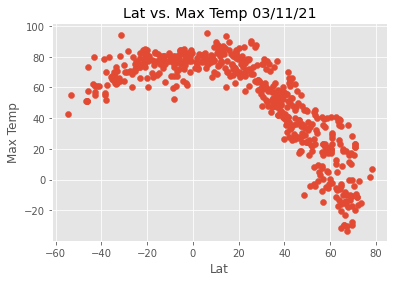

In [55]:
#params to look at
colx = "Lat"
coly = "Max Temp"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Latitude vs. Humidity Plot

This plot examines and displays the relationship between Lat and Humidity for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Humidity? Does it increase/decrease?


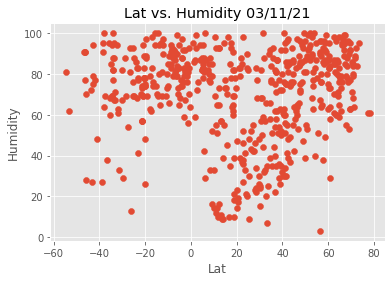

In [56]:
colx = "Lat"
coly = "Humidity"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Latitude vs. Cloudiness Plot

This plot examines and displays the relationship between Lat and Cloudiness for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Cloudiness? Does it increase/decrease?


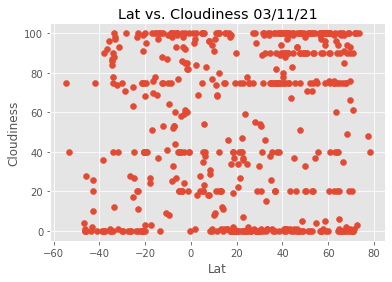

In [57]:
colx = "Lat"
coly = "Cloudiness"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Latitude vs. Wind Speed Plot

This plot examines and displays the relationship between Lat and Wind Speed for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Wind Speed? Does it increase/decrease?


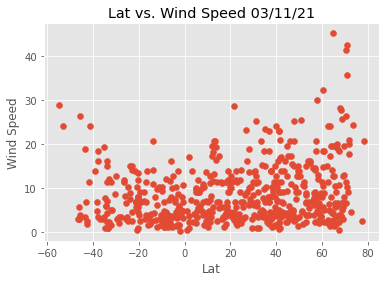

In [58]:
colx = "Lat"
coly = "Wind Speed"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

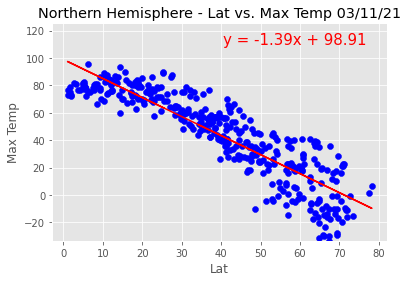

In [59]:
colx = "Lat"
coly = "Max Temp"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

In [60]:
regress_values[len(regress_values)-1]

17.059907786647045

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

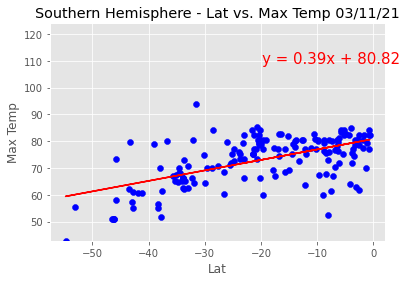

In [61]:
colx = "Lat"
coly = "Max Temp"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [62]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Max Temp decreases.
For the southern hemisphere, as Lat increases, Max Temp increases.
The correlation for Lat vs. Max Temp in the Northern Hemisphere is -0.89 which is strong.
The correlation for Lat vs. Max Temp in the Southern Hemisphere is 0.58 which is moderate.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

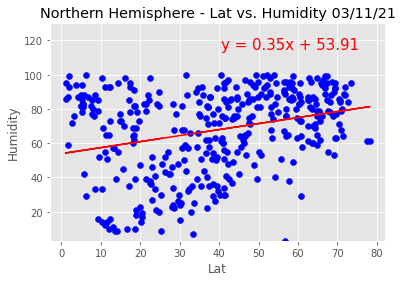

In [63]:
colx = "Lat"
coly = "Humidity"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

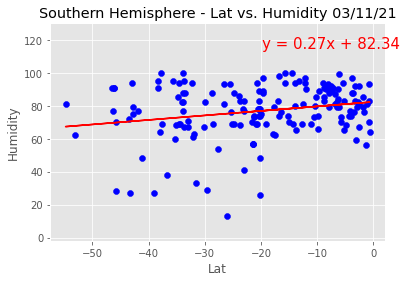

In [64]:
colx = "Lat"
coly = "Humidity"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [65]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Humidity increases.
For the southern hemisphere, as Lat increases, Humidity increases.
The correlation for Lat vs. Humidity in the Northern Hemisphere is 0.29 which is weak.
The correlation for Lat vs. Humidity in the Southern Hemisphere is 0.23 which is weak.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

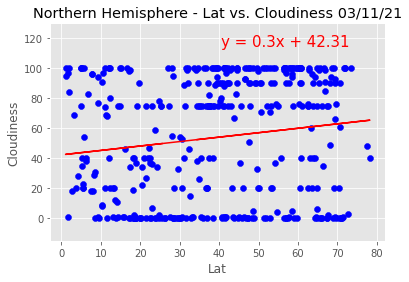

In [66]:
colx = "Lat"
coly = "Cloudiness"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

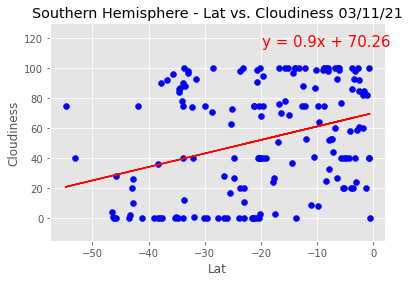

In [67]:
colx = "Lat"
coly = "Cloudiness"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [68]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Cloudiness increases.
For the southern hemisphere, as Lat increases, Cloudiness increases.
The correlation for Lat vs. Cloudiness in the Northern Hemisphere is 0.15 which is weak.
The correlation for Lat vs. Cloudiness in the Southern Hemisphere is 0.33 which is weak.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

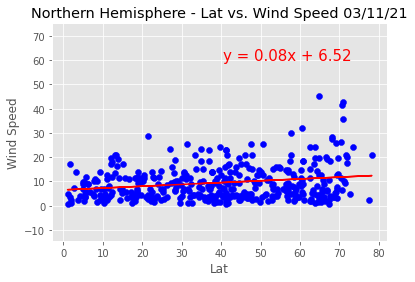

In [69]:
colx = "Lat"
coly = "Wind Speed"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

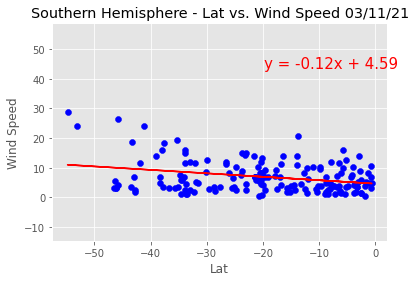

In [70]:
colx = "Lat"
coly = "Wind Speed"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [71]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Wind Speed increases.
For the southern hemisphere, as Lat increases, Wind Speed decreases.
The correlation for Lat vs. Wind Speed in the Northern Hemisphere is 0.21 which is weak.
The correlation for Lat vs. Wind Speed in the Southern Hemisphere is -0.3 which is weak.


In [72]:
# code used during tutoring session to nail down finer points of fig, ax, annotate etc. ignore for HW.

# colx = "Lat"
# coly = "Wind Speed"
# #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
# north_hem = clean_city_data["Lat"]>=0
# south_hem = clean_city_data["Lat"]<0

# #Set up x and y for the scatter plot using params above.
# x_north=clean_city_data[north_hem][colx]
# y_north=clean_city_data[north_hem][coly]
# x_south=clean_city_data[south_hem][colx]
# y_south=clean_city_data[south_hem][coly]
# plot_title = colx +" vs. " + coly

# plot_title = title_hem + colx +" vs. " + coly
    
# #linreg (with plot equation) NORTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north)
# regress_values = slope*x_north + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# # subplots takes rows, columns for how many subplots
# #figsize default is 6.4 and 4.8
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,12))
# ax1.plot(x_north,regress_values,"r-")
# ax1.annotate(line_eq,(x_north.median(),y_north.min()),fontsize=15,color="red")
# #plot setup
# ax1.scatter(x_north,y_north,color="blue",alpha=0.5)
# ax1.set_xlabel(colx)
# ax1.set_ylabel(coly)
# ax1.set_title( "Northern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #linreg (with plot equation) SOUTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south)
# regress_values = slope*x_south + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# ax2.plot(x_south,regress_values,"r-")
# #plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")
# #plot setup
# ax2.scatter(x_south,y_south,color="gray")
# ax2.set_xlabel(colx)
# ax2.set_ylabel(coly)
# ax2.set_title( "Southern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
# # plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')